In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
a = ['FHC', 'FIP', 'FKC', 'FLCP', 'FLE', 'FMCP', 'FME', 'FTP', 'TAC', 'TLCP', 'TMCP', 'TKC']
b = ['TMDL', 'TMDU', 'FMDU', 'FMDL']

for i in a:
    exec(i + ' = pd.read_csv(\'' + i + '.csv\')')
    exec(i + ' = ' + i + '.drop(' + i + '.index[0])')
    exec(i + ' = ' + i + '[' + i + '[\'Extra\'] == \'Y\']')
    exec(i + ' = ' + i + '.iloc[:, 2:14]')
    exec(i + ' = ' + i + '.apply(pd.to_numeric)')
    exec(i + ' = ' + i + '.to_numpy(dtype=float)')
    exec(i + ' = ' + i + '.reshape(-1, 4, 3)')

for i in b:
    exec(i + ' = pd.read_csv(\'' + i + '.csv\')')
    exec(i + ' = ' + i + '.drop(' + i + '.index[0])')
    exec(i + ' = ' + i + '[' + i + '[\'Extra\'] == \'Y\']')
    exec(i + ' = ' + i + '.iloc[:, [2, 3, 5, 6, 8, 9, 11, 12]]')
    # exec(i + ' = ' + i + '.iloc[:, 2:14]')
    exec(i + ' = ' + i + '.apply(pd.to_numeric)')
    exec(i + ' = ' + i + '.to_numpy(dtype=float)')
    exec(i + ' = ' + i + '.reshape(-1, 4, 2)')
    # exec(i + ' = ' + i + '.reshape(-1, 4, 3)')

# remove 56th data point from TMDL since n/a values exist.
TMDL = np.delete(TMDL, 55, axis=0)

data = [FHC, FIP, FKC, FLCP, FLE, FMCP, FME, FTP, TAC, TLCP, TMCP, TKC, FMDU, FMDL, TMDU, TMDL]
names = ['FHC', 'FIP', 'FKC', 'FLCP', 'FLE', 'FMCP', 'FME', 'FTP', 'TAC', 'TLCP', 'TMCP', 'TKC', 'FMDU', 'FMDL', 'TMDU', 'TMDL']

In [20]:

plots2 = []
for i in data:
    mean = np.mean(i, axis=1)
    diff = i - mean[:, np.newaxis]
    norm = np.linalg.norm(diff, axis=2) #this line gives the euclidian distances!!! 
    plots2.append(np.mean(norm, axis=0))

plots2 = np.array(plots2)

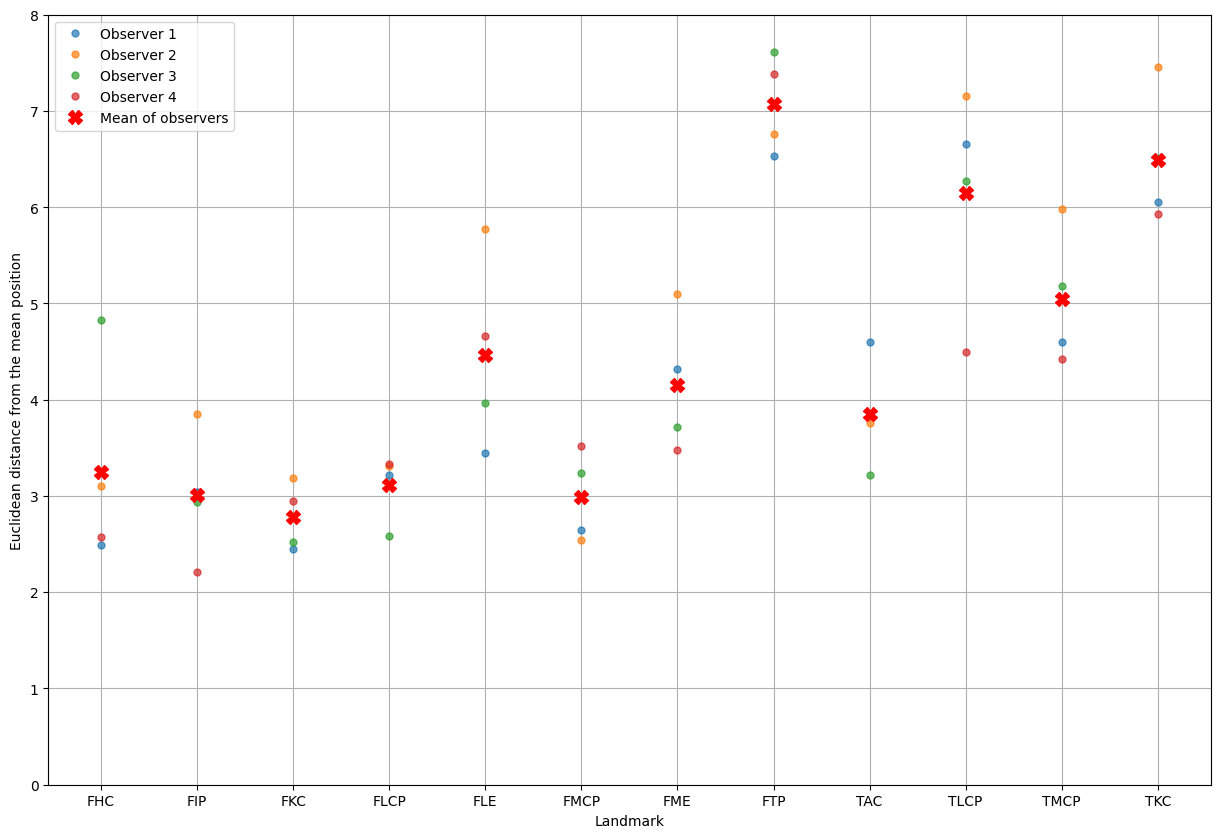

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(names[:-4], plots2[:-4], 'o', markersize=5, label=['Observer 1', 'Observer 2', 'Observer 3', 'Observer 4'], alpha=0.7)
plt.plot(names[:-4], np.mean(plots2[:-4], axis=1), 'X', markersize=10, color='red', label='Mean of observers')

plt.ylim(0, 8)
plt.xlabel('Landmark')
plt.ylabel('Euclidean distance from the mean position')
plt.legend()

plt.grid()

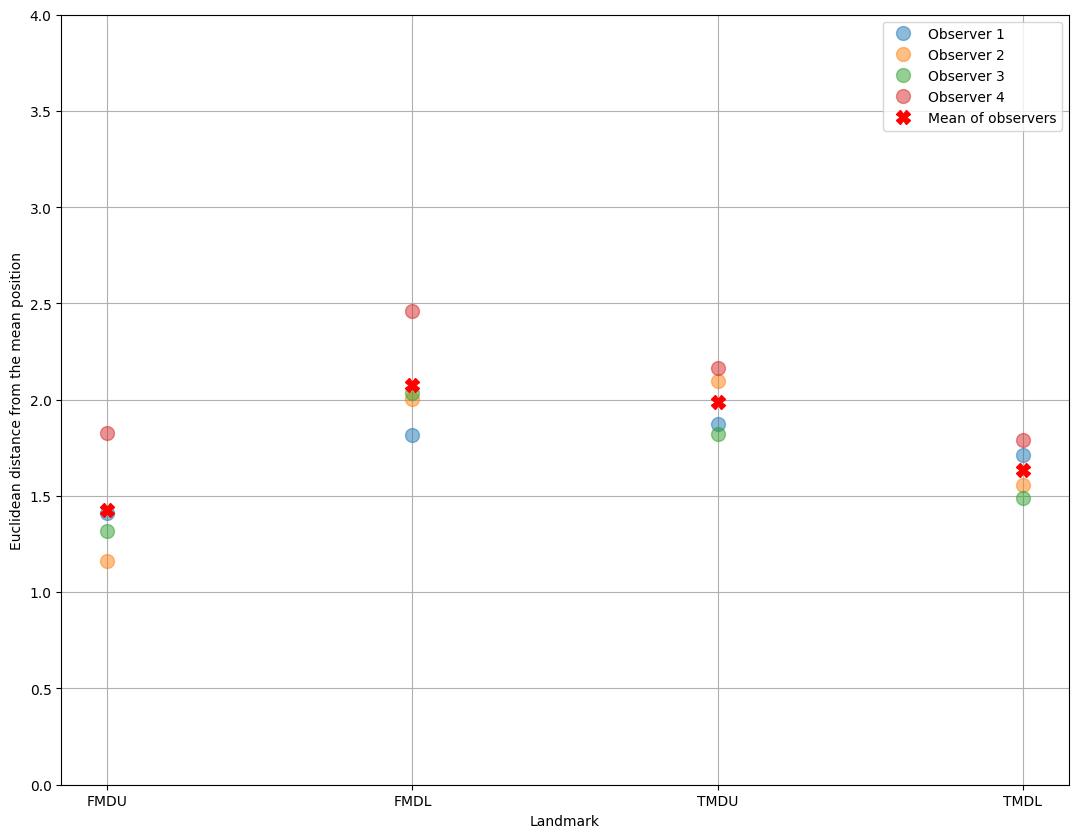

In [22]:
plt.figure(figsize=(13, 10))
plt.plot(names[-4:], plots2[-4:], 'o', markersize=10, label=['Observer 1', 'Observer 2', 'Observer 3', 'Observer 4'], alpha=0.5)
plt.plot(names[-4:], np.mean(plots2[-4:], axis=1), 'X', markersize=10, color='red', label='Mean of observers')

plt.ylim(0, 4)
plt.xlabel('Landmark')
plt.ylabel('Euclidean distance from the mean position')
plt.legend()

plt.grid()